# Gold Price Prediction

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
path = '/content/drive/MyDrive/mlproject2/gld_price_data.csv'

In [3]:
# importing the dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [4]:
# data preprocessing
gold_data = pd.read_csv(path)

In [6]:
# print first five rows in  dataframe
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [7]:
gold_data.shape

(2290, 6)

In [8]:
#print the last 5 rows of the dataframe
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [10]:
# number of rows and columns
gold_data.shape

(2290, 6)

In [14]:
# getting some basic information about the data
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [15]:
# checking the numner of missing values
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [16]:
# getting the statistical measure of the data
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


correlation:

1. Positive Correlation

2. Negative Correlation

In [17]:
correlation = gold_data.corr()

<ipython-input-17-b9d572e5c3ef>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = gold_data.corr()


<Axes: >

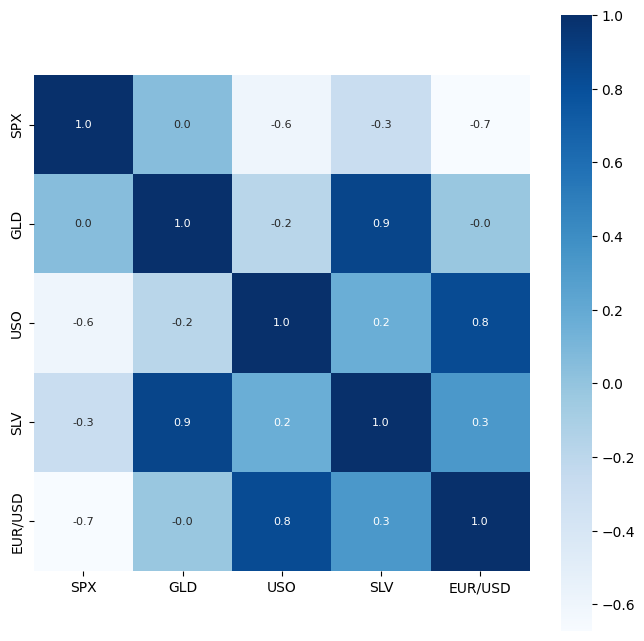

In [20]:
# constructing a heatmap to understand the correlation
plt.figure(figsize = (8,8))
sns.heatmap(correlation , cbar=True , square=True, fmt='.1f' , annot=True,annot_kws={'size':8}, cmap='Blues')

In [21]:
# correlation vlaues of GLD
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


<ipython-input-23-0c7dffca388c>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gold_data['GLD'],color='green')


<Axes: xlabel='GLD', ylabel='Density'>

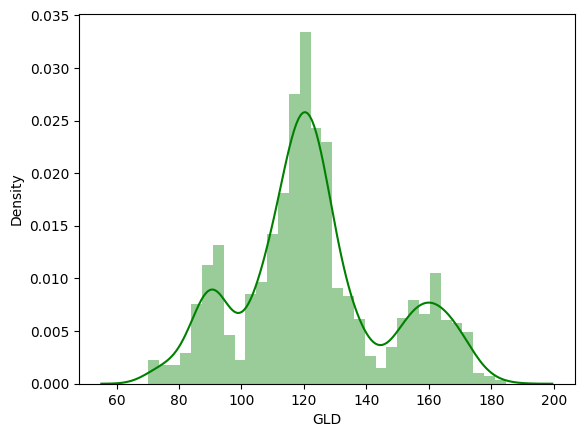

In [23]:
# chekc the distribution of the GLD price
sns.distplot(gold_data['GLD'],color='green')

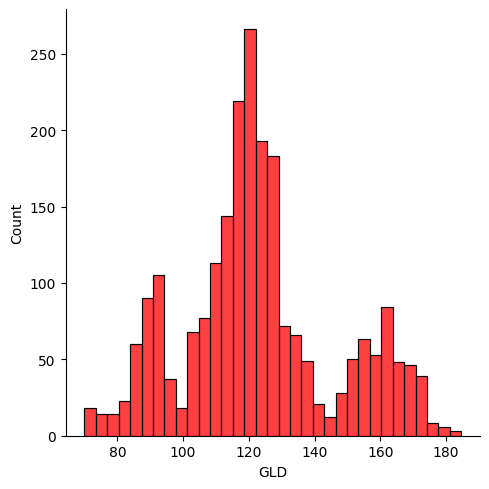

In [25]:
sns.displot(gold_data['GLD'], color='red')

splitting the features and target

In [26]:
X = gold_data.drop(['Date','GLD'], axis=1)
Y = gold_data['GLD']

In [27]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [28]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


splitting into Training data and Test data

In [29]:
X_train, X_test, Y_train , Y_test = train_test_split(X,Y, test_size= 0.2, random_state= 2)

Model Trainig:

Random Forest Regression

In [30]:
regressor = RandomForestRegressor(n_estimators=100)


In [31]:
#training the model
regressor.fit(X_train, Y_train)

RandomForestRegressor()

Model Evaluation


In [32]:
# prediction on Test Data
test_data_prediction = regressor.predict(X_test)

In [33]:
print(test_data_prediction)

[168.74819934  82.13160002 115.59330014 127.65640086 120.37630159
 154.57559787 150.69889945 126.14120041 117.46039874 125.92980101
 116.49890092 171.43920103 141.66749867 167.67609813 115.15139993
 117.5627006  138.04760315 169.83740086 159.79650251 161.34579963
 155.12390021 125.1269     176.09219962 157.28380329 125.27210035
  93.9664997   77.00590031 120.65509994 119.16999974 167.34549938
  88.29830073 125.31480016  91.11540045 117.63000007 121.06949935
 136.0939011  115.57360101 115.39910083 147.05719938 107.48210094
 104.36420246  87.2641979  126.45490048 117.91420032 154.847099
 119.71269991 108.38430013 108.04249826  93.16580033 127.02729806
  75.07110029 113.70299927 121.23580026 111.27899891 118.92379892
 120.61959912 159.70339947 167.15780087 147.14259737  85.91239864
  94.44230009  86.87059903  90.50850054 118.93660076 126.46620069
 127.61030011 170.7752     122.28789962 117.41509878  98.31560038
 168.46670139 143.10729862 131.92590214 121.13180237 121.14449941
 119.5338007

In [35]:
# R squared error
error_score = metrics.r2_score(Y_test , test_data_prediction)
print('R squared error', error_score)

R squared error 0.9901181805088384


Compare the actual values and predicted values in a plot

In [36]:
Y_test = list(Y_test)

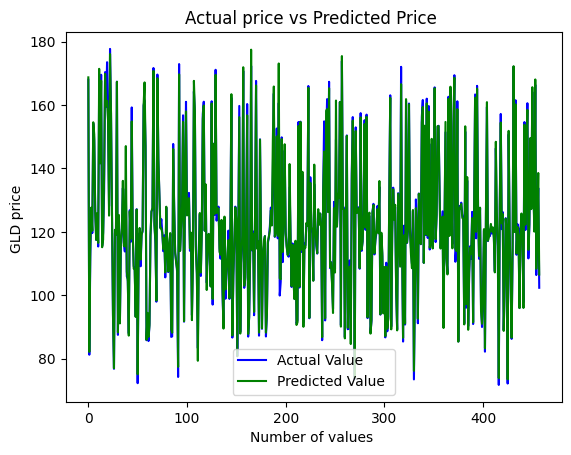

In [37]:
plt.plot(Y_test , color='blue' , label = 'Actual Value')
plt.plot(test_data_prediction , color='green' , label='Predicted Value ')
plt.title('Actual price vs Predicted Price ')
plt.xlabel("Number of values ")
plt.ylabel('GLD price ')
plt.legend()
plt.show()